# Example workflow for using flosp to import and clean ED data

Get to directory above to import flosp

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is EE63-178E

 Directory of C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp\example

13/02/2019  14:51    <DIR>          .
13/02/2019  14:51    <DIR>          ..
04/01/2019  11:00    <DIR>          .ipynb_checkpoints
12/02/2019  14:42    <DIR>          __pycache__
05/02/2019  15:00         3,513,598 example_data_ED.csv
05/02/2019  12:12        20,308,140 example_data_IP.csv
13/02/2019  14:51           173,411 example_flosp_workflow.ipynb
05/02/2019  10:13    <DIR>          example_results
05/02/2019  13:19               214 setup.py
               4 File(s)     23,995,363 bytes
               5 Dir(s)  334,520,270,848 bytes free


In [3]:
%cd ".\..

C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp


In [4]:
import flosp

## initialise flosp

You must provide the path to the setup file, which you should edit to your project specifics.

In [5]:
from flosp import Interface

In [6]:
hosp = Interface(setup_file_path='./setup.py')

flosp started.
<module 'flosp.expected_structures.ED' from 'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH030_HHFT_flow\\4_Analysis\\flosp\\flosp\\expected_structures\\ED.py'>
<module 'flosp.expected_structures.IP' from 'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH030_HHFT_flow\\4_Analysis\\flosp\\flosp\\expected_structures\\IP.py'>
Imported setup.py sucessfully.
Loading processed data from pickles.
Found: ./example/example_results/processed/ED.pkl
Missing: ./example/example_results/processed/IPfce.pkl
Missing: ./example/example_results/processed/IPward.pkl
Missing: ./example/example_results/processed/IPspell.pkl
Missing: ./example/example_results/processed/HOURLY.pkl
Missing: ./example/example_results/processed/DAILY.pkl


In [7]:
hosp = Interface(setup_file_path='./ff/setup.py')

flosp started.
<module 'flosp.expected_structures.ED' from 'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH030_HHFT_flow\\4_Analysis\\flosp\\flosp\\expected_structures\\ED.py'>
<module 'flosp.expected_structures.IP' from 'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH030_HHFT_flow\\4_Analysis\\flosp\\flosp\\expected_structures\\IP.py'>
Imported setup.py sucessfully.
Loading processed data from pickles.
Found: ./example/example_results/processed/ED.pkl
Missing: ./example/example_results/processed/IPfce.pkl
Missing: ./example/example_results/processed/IPward.pkl
Missing: ./example/example_results/processed/IPspell.pkl
Missing: ./example/example_results/processed/HOURLY.pkl
Missing: ./example/example_results/processed/DAILY.pkl


In [8]:
from example.setup import HOSPITAL_NAME

setup_file_path = './setup.py'

from setup_file_path import HOSPITAL_NAME

### Importing ED data

load raw data

In [9]:
hosp.load_dataED('./example/example_data_ED.csv') #,nrows=1500) # limit number of rows for quick runtime during dev

IO class called.
ARRIVAL_DTTM
TRIAGE_ASSESSMENT_DTTM
FIRSTDOC_FOR_TREATMENT_DTTM
ADM_REQUEST_DTTM
DEPARTURE_DTTM
----------------------------------------
Making callender columns from:  ARRIVAL_DTTM
----------------------------------------
Making callender columns from:  DEPARTURE_DTTM
----------------------------------------
saved file: ./example/example_results/processed/ED.pkl
Import completed.


look at the dataframe at any stage of processing

In [10]:
hosp.extract_data('ED').head()

,PSEUDONYMISED_PATIENT_ID,AGE_AT_ARRIVAL,GENDER_NATIONAL_DESCRIPTION,SITE,ARRIVAL_DTTM,ARRIVAL_MODE_NATIONAL_CODE,TRIAGE_ASSESSMENT_DTTM,FIRSTDOC_FOR_TREATMENT_DTTM,ADM_REQUEST_DTTM,ADM_REQUEST_LOC_DESCRIPTION,...,age_group,waiting_time,arr_triage_wait,arr_dr_wait,arr_adm_req_wait,adm_req_dep_wait,dr_adm_req_wait,dr_dep_wait,BREACH_FLAG,breach_datetime
0,4484,56,Female,HOSPITAL1,2013-08-04 09:59:00,2.0,2013-08-01 10:52:00,2013-08-01 12:41:00,NaT,NaN,...,18-64,-1297.0,-4267.0,-4158.0,NaN,NaN,NaN,2861.0,0,2013-08-04 13:59:00
1,3924,88,Female,HOSPITAL1,2014-04-09 10:14:00,1.0,2014-04-10 08:55:00,2014-04-08 10:51:00,2014-04-09 13:29:15,General Medicine,...,65+,294.0,1361.0,-1403.0,195.25,98.75,1598.25,1697.0,1,2014-04-09 14:14:00
2,2622,41,Female,HOSPITAL1,2012-11-30 03:49:00,1.0,2012-11-30 05:30:00,2012-11-29 05:43:00,NaT,NaN,...,18-64,1582.0,101.0,-1326.0,NaN,NaN,NaN,2908.0,1,2012-11-30 07:49:00
3,6868,29,Male,HOSPITAL1,2017-09-06 18:49:00,2.0,2017-09-06 19:04:00,2017-09-05 19:15:00,NaT,NaN,...,18-64,197.0,15.0,-1414.0,NaN,NaN,NaN,1611.0,0,2017-09-06 22:49:00
4,1563,35,Male,HOSPITAL1,2015-07-12 15:54:00,2.0,2015-07-14 16:09:00,2015-07-15 15:41:00,NaT,NaN,...,18-64,2902.0,2895.0,4307.0,NaN,NaN,NaN,-1405.0,1,2015-07-12 19:54:00


subsampling method - for quicker inital runtime during development of cleaning (some of the datetime conversions can take some time on larger data sets

## Import IP data

In [11]:
hosp.load_dataIP('./example/example_data_IP.csv')

IO class called.
ADM_DTTM
DIS_DTTM
LOCATION_START
LOCATION_END
----------------------------------------
Making callender columns from:  ADM_DTTM
----------------------------------------
Making callender columns from:  DIS_DTTM


C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp\flosp\basic_tools.py:99: UserWarning: Some datetimes in your column are missing.
  warnings.warn('Some datetimes in your column are missing.')


----------------------------------------
saved file: ./example/example_results/processed/IP.pkl
Import completed.


In [12]:
hosp.extract_data('IP').head()

,LOCATION_NUMBER,ADM_SOURCE_CODE,ADM_METHOD,ADM_DTTM,ADM_TYPE,SITE,GENDER_NATIONAL_DESCRIPTION,LOCATION_END,DIS_DESTINATION,DIS_METHOD,...,DIS_hour,DIS_dayofweek,DIS_day,DIS_month,DIS_week,DIS_dayofweek_name,DIS_year,DIS_date,DIS_flag_wkend,age_group
0,1,19,31,2017-07-05 07:32:00,Non-Elective,HOSPITAL1,2,2017-07-08 13:53:00,19.0,1.0,...,14.0,5.0,8.0,7.0,27.0,Saturday,2017.0,2017-07-08,0,18-64
1,1,79,82,2017-06-17 05:03:00,Day Case,HOSPITAL1,1,2017-06-20 22:41:00,19.0,1.0,...,21.0,1.0,20.0,6.0,25.0,Tuesday,2017.0,2017-06-20,0,18-64
2,9,19,21,2017-11-09 22:08:00,Non-Elective,HOSPITAL1,1,2017-12-19 09:38:00,19.0,1.0,...,15.0,2.0,20.0,12.0,51.0,Wednesday,2017.0,2017-12-20,0,65+
3,12,19,21,2017-12-08 17:41:00,Non-Elective,HOSPITAL1,1,2018-02-03 11:00:00,19.0,1.0,...,11.0,5.0,3.0,2.0,5.0,Saturday,2018.0,2018-02-03,0,65+
4,2,19,21,2018-04-07 15:25:00,Non-Elective,HOSPITAL1,1,2018-04-11 19:51:00,19.0,1.0,...,19.0,2.0,11.0,4.0,15.0,Wednesday,2018.0,2018-04-11,0,65+


# Make aggregated tables at hourly and daily level

In [13]:
%matplotlib inline

In [14]:
hosp.make_new_tables()

[Timestamp('2018-02-09 11:26:00'), Timestamp('2018-09-03 20:06:00')]


C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: FutureWarning: In the future, NAT != NAT will be True rather than False.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


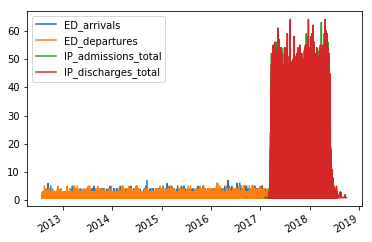

In [15]:
hosp.data.HOURLY.plot()

In [18]:
hosp.data.HOURLY2.sum()

ED_occ_total    0.0
dtype: float64

In [20]:
hosp.data.ED.ARRIVAL_DTTM.max()

Timestamp('2018-02-09 11:26:00')

In [18]:
hosp.data.HOURLY2.sum()

ED_arrivals                1.0
ED_departures              7.0
IP_admissions_total    37674.0
IP_discharges_total    40055.0
dtype: float64

In [ ]:
hosp.

In [16]:
hosp.data.HOURLY

,ED_arrivals,ED_departures,IP_admissions_total,IP_discharges_total
2018-02-09 00:00:00,NaN,NaN,9.0,1.0
2018-02-09 01:00:00,NaN,NaN,7.0,1.0
2018-02-09 02:00:00,NaN,NaN,7.0,3.0
2018-02-09 03:00:00,NaN,NaN,3.0,4.0
2018-02-09 04:00:00,NaN,NaN,3.0,NaN
2018-02-09 05:00:00,NaN,NaN,5.0,NaN
2018-02-09 06:00:00,NaN,NaN,27.0,1.0
2018-02-09 07:00:00,NaN,NaN,31.0,1.0
2018-02-09 08:00:00,NaN,1.0,20.0,6.0
2018-02-09 09:00:00,NaN,NaN,16.0,7.0


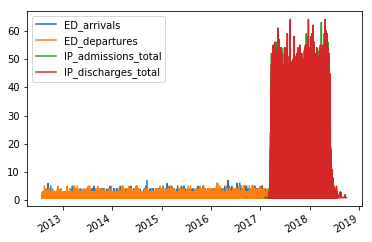

In [15]:
hosp.data.HOURLY.plot()

In [16]:
hosp.data.ED.shape

(28382, 42)

In [17]:
hosp.data.HOURLY

,ED_arrivals,ED_departures,IP_admissions_total,IP_discharges_total
NaT,NaN,NaN,NaN,18.0
2012-07-30 12:00:00,1.0,NaN,NaN,NaN
2012-07-30 13:00:00,1.0,NaN,NaN,NaN
2012-07-30 14:00:00,NaN,1.0,NaN,NaN
2012-07-30 16:00:00,1.0,NaN,NaN,NaN
2012-07-30 18:00:00,1.0,NaN,NaN,NaN
2012-07-30 20:00:00,NaN,1.0,NaN,NaN
2012-07-31 00:00:00,1.0,NaN,NaN,NaN
2012-07-31 05:00:00,NaN,1.0,NaN,NaN
2012-07-31 10:00:00,NaN,2.0,NaN,NaN


In [18]:
hosp.data.ED.shape

(28382, 42)

In [19]:
hosp.data.ED.columns

Index(['PSEUDONYMISED_PATIENT_ID', 'AGE_AT_ARRIVAL',
       'GENDER_NATIONAL_DESCRIPTION', 'SITE', 'ARRIVAL_DTTM',
       'ARRIVAL_MODE_NATIONAL_CODE', 'TRIAGE_ASSESSMENT_DTTM',
       'FIRSTDOC_FOR_TREATMENT_DTTM', 'ADM_REQUEST_DTTM',
       'ADM_REQUEST_LOC_DESCRIPTION', 'ADMISSION_FLAG', 'DEPARTURE_DTTM',
       'STREAM_LOCAL_CODE', 'ARRIVAL_hour', 'ARRIVAL_dayofweek', 'ARRIVAL_day',
       'ARRIVAL_month', 'ARRIVAL_week', 'ARRIVAL_dayofweek_name',
       'ARRIVAL_year', 'ARRIVAL_date', 'ARRIVAL_flag_wkend', 'DEPARTURE_hour',
       'DEPARTURE_dayofweek', 'DEPARTURE_day', 'DEPARTURE_month',
       'DEPARTURE_week', 'DEPARTURE_dayofweek_name', 'DEPARTURE_year',
       'DEPARTURE_date', 'DEPARTURE_flag_wkend', 'age_group', 'waiting_time',
       'arr_triage_wait', 'arr_dr_wait', 'arr_adm_req_wait',
       'adm_req_dep_wait', 'dr_adm_req_wait', 'dr_dep_wait', 'BREACH_FLAG',
       'breach_datetime', 'event_column_name_rounded'],
      dtype='object')

In [20]:
def count_hourly_occupancy(df,arrival_col,departure_col,count_name):
    """
    inputs:
    df with attendance number as index,
    arrival, departure datetime col names (must be datetime format)
    ouptut:
    df, contains many-to-many link between the arrival_
    """
    df1 = df[[arrival_col,departure_col]].head(1000).copy()
    df1[arrival_col] = df1[arrival_col].apply(lambda x : x.replace(second=0,minute=0)) # round arrival hour down
    df1[departure_col] = df1[departure_col].apply(lambda x : x.replace(second=0,minute=0)) +pd.Timedelta(hours=1) # round leaving tim up
    
    #### create col with number of hours active 
    df1['n_hours'] = ((df1[departure_col] - df1[arrival_col])/pd.Timedelta(1,'h')).astype(int)
    df1 = df1.drop(df1[df1['n_hours'] <=0].index) # must drop the negative n_hour rows as otherwise messes up my size of array initilisation (was getting an error that the index i was assinging to in ids was out of bounds).
    
    #### time efficient (i hope) function for cycling through and finding all combinations of active hours for attednaces - create a (long format) list of links between attendance numbers and 

    # function for list comp which finds list of datetimes (for each hour)
    date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')

    # iterate over rows in df
    df1 = df1.reset_index() # reset so have the new index to itereate over

    ids = np.empty(shape=(df1['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
    timestamps = np.empty(shape=(df1['n_hours'].sum()),dtype='datetime64[s]')
    row_count = 0

    for row in df1.itertuples():
        atten_id = [row[1]]
        hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # creates list of hour datetimes

        # create array of list for all combinations of timestamp
        for i in itertools.product(atten_id,hour_list):
            ids[row_count] = i[0] # assign patient numbers
            timestamps[row_count] = i[1]
            row_count += 1 # add to row count for new array    
    # put into df
    data = {'atten_id':ids}
    df_new = pd.DataFrame(data=data,index=timestamps)#,columns=[count_name])

    return(df_new)


In [21]:
test =count_hourly_occupancy(hosp.data.ED,'ARRIVAL_DTTM','DEPARTURE_DTTM','test')

NameError: name 'pd' is not defined

In [ ]:
def count_hourly_events(df,event_column_name,new_col_name):
    """
    Count number of events (records) at hourly level, given datetime column.
    input: df, column_name
    """
    #### set up data to make calc easier
    df['event_column_name_rounded'] = df[event_column_name].apply(lambda x : x.replace(second=0,minute=0)) # round to lower hour
    
    #### make array and find counts of uniques datetimes
    times = df['event_column_name_rounded'].values
    unique, counts = np.unique(times, return_counts=True)
    
    # put into df
    event_counts = pd.DataFrame(data = counts, index= unique,columns =[new_col_name] )
    return event_counts

count_hourly_events(hosp.data.ED,'ARRIVAL_DTTM','new_col')

In [ ]:
a = np.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])
unique, counts = np.unique(a, return_counts=True)

In [ ]:
counts

In [ ]:
a = np.array(df1.index)
unique, counts = np.unique(a, return_counts=True)

In [ ]:
df1.index

In [ ]:
df1.col1.values

In [ ]:
pd.Series(df1.index)

In [ ]:

hosp.data.ED['ARRIVAL_DTTM'].apply(lambda x : x.replace(second=0,minute=0))

In [ ]:
%matplotlib inline
test.plot()

In [ ]:
test['atten_id'].value_counts()

In [ ]:
break

# Dev

In [23]:
import pandas as pd
import numpy as np

In [24]:
pd.datetime.now()

datetime.datetime(2019, 2, 13, 12, 24, 31, 925039)

In [25]:
master_index = pd.DatetimeIndex(start=pd.datetime(2019,1,1),periods=20,freq='D').round('D')
master_index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20'],
              dtype='datetime64[ns]', freq=None)

In [26]:
df1 = pd.DataFrame([3,5],master_index[0:2],columns=['col1'])
df1

,col1
2019-01-01,3
2019-01-02,5


In [27]:
df2 = pd.DataFrame([8,9],master_index[8:10],columns=['col2'])
df2

,col2
2019-01-09,8
2019-01-10,9


In [28]:
df3 = pd.DataFrame([1,2,3],master_index[1:4],columns=['col3'])
df3

,col3
2019-01-02,1
2019-01-03,2
2019-01-04,3


In [29]:
concat = pd.concat([df1,df2,df3],sort=True)
concat

,col1,col2,col3
2019-01-01,3.0,NaN,NaN
2019-01-02,5.0,NaN,NaN
2019-01-09,NaN,8.0,NaN
2019-01-10,NaN,9.0,NaN
2019-01-02,NaN,NaN,1.0
2019-01-03,NaN,NaN,2.0
2019-01-04,NaN,NaN,3.0


In [30]:
concat.reindex()

,col1,col2,col3
2019-01-01,3.0,NaN,NaN
2019-01-02,5.0,NaN,NaN
2019-01-09,NaN,8.0,NaN
2019-01-10,NaN,9.0,NaN
2019-01-02,NaN,NaN,1.0
2019-01-03,NaN,NaN,2.0
2019-01-04,NaN,NaN,3.0


In [31]:
pd.master_index

AttributeError: module 'pandas' has no attribute 'master_index'

In [35]:
from functools import reduce
data_frames = [df1, df3, df2]
df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True,
                                            how='outer'), data_frames)
df_merged.ffill()
df_merged

,col1,col3,col2
2019-01-01,3.0,NaN,NaN
2019-01-02,5.0,1.0,NaN
2019-01-03,NaN,2.0,NaN
2019-01-04,NaN,3.0,NaN
2019-01-09,NaN,NaN,8.0
2019-01-10,NaN,NaN,9.0


In [37]:
df_merged.reindex(index=master_index)

,col1,col3,col2
2019-01-01,3.0,NaN,NaN
2019-01-02,5.0,1.0,NaN
2019-01-03,NaN,2.0,NaN
2019-01-04,NaN,3.0,NaN
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN
2019-01-09,NaN,NaN,8.0
2019-01-10,NaN,NaN,9.0


### mapping columns to standard naming convention

unless your columns are already named using the required names - use column mapping method

In [1]:
#### define dictionary for mapping
col_map = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrive_datetime',
'ARRIVAL_MODE_NATIONAL_CODE':'arrive_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_datetime',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_datetime',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_DESCRIPTION':'adm_referral_loc',
'ADMISSION_FLAG':'adm_flag',
'DEPARTURE_DTTM':'depart_datetime',
'STREAM_LOCAL_CODE':'stream'
}

In [3]:
len(col_map)

13

In [7]:
EDdata.map_columns(col_map)

----------------------------------------
mapping column names


required column names can be found: 

In [8]:
flosp._expected_file_structures.dataRAW_expected_cols.keys()

dict_keys(['hosp_patid', 'age', 'age_group', 'gender', 'arrive_datetime', 'arrive_mode', 'arrive_hour', 'arrive_dayofweek', 'arrive_month', 'arrive_dayofweek_name', 'arrive_date', 'arrive_week', 'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_datetime', 'adm_referral_loc', 'depart_datetime', 'depart_method', 'depart_hour', 'depart_dayofweek', 'depart_week', 'depart_month', 'depart_dayofweek_name', 'depart_date', 'waiting_time', 'BREACH_FLAG', 'adm_flag', 'stream', 'minutes_today', 'minutes_tomo', 'breach_datetime', 'arr_triage_wait', 'arr_dr_wait', 'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait', 'dr_dep_wait'])

In [9]:
EDdata.get_EDraw().head(3)

,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_time,adm_referral_loc,adm_flag,depart_datetime,stream
0,2493,50,Female,HOSPITAL1,2013-01-08 19:44:00,2.0,2013-01-07 18:50:00,2013-01-09 21:50:00,NaN,NaN,0,2013-01-10 23:16:00,MIN
1,4822,22,Male,HOSPITAL1,2013-07-03 09:34:00,2.0,2013-07-03 08:57:00,2013-07-02 09:17:00,NaN,NaN,0,2013-07-05 09:02:00,MIN
2,6012,51,Male,HOSPITAL1,2017-08-27 23:33:00,2.0,2017-08-26 01:32:00,2017-08-27 03:12:00,NaN,NaN,0,2017-08-26 03:31:00,MIN


### bespoke user cleaning operations 

if at any stage manual edits to the data are required (e.g. cleaning a spurious datetime)... get data out of class, edit and replace:

In [10]:
#### get data out
df = EDdata.get_EDraw()

#### make changes to df
# my changes here

#### replace data into EDdata
EDdata.replace_EDraw(df)

### converting datetimes
#### datetime formats are often non-standard...some attention is needed but there are some built in methods to help.

convert columns to datetime formats (by default anything with 'datetime' in column name will be transformed.

In [11]:
EDdata.convert_cols_datetime("%Y/%m/%d %H:%M")

C:\Users\bjk1y13\OneDrive - University of Southampton\MH000_HHFT_flow\4_Analysis\flosp\flosp\ioED.py:101: UserWarning: Datetime conversion can be problemtic. Make sure you have used the correct datetime string format for each column. You can call this method multiple times with different 'datetime formats' & 'list of columns' to convert if neccessary.
  warnings.warn("Datetime conversion can be problemtic. Make sure you have used the correct datetime string format for each column. You can call this method multiple times with different 'datetime formats' & 'list of columns' to convert if neccessary.")


Converting cols to datetime...(may take some time depedning on size of df)...
arrive_datetime...converting
first_triage_datetime...converting
first_dr_datetime...converting
depart_datetime...converting


create a datetime column from seperate time and date columns.

In [12]:
EDdata.create_datetime_from_time('first_adm_request_time','arrive_datetime','first_adm_request_datetime')

----------------------------------------
Create datetime column from: first_adm_request_time & arrive_datetime


C:\Users\bjk1y13\OneDrive - University of Southampton\MH000_HHFT_flow\4_Analysis\flosp\flosp\basic_tools.py:131: UserWarning: 422 patients detected who have -ve wait times. They have probably rolled over midnight, so we add + 1day to the new datetime column created. This assumes < 24hr stays only.



  warnings.warn(str(datetime_values.shape[0]) + ' patients detected who have -ve wait times. They have probably rolled over midnight, so we add + 1day to the new datetime column created. This assumes < 24hr stays only.\n\n\n')


### automated cleaning

check what else needs doing to get data into normalised format:

In [13]:
EDdata.run_tests()

--------------------
Finding missing columns...
age_group try using:  use make_age_group_column
arrive_hour try using:  make_callender_columns
arrive_dayofweek try using:  make_callender_columns
arrive_month try using:  make_callender_columns
arrive_dayofweek_name try using:  make_callender_columns
arrive_date try using:  make_callender_columns
arrive_week try using:  make_callender_columns
depart_method try using:  
depart_hour try using:  make_callender_columns
depart_dayofweek try using:  make_callender_columns
depart_week try using:  make_callender_columns
depart_month try using:  make_callender_columns
depart_dayofweek_name try using:  make_callender_columns
depart_date try using:  make_callender_columns
waiting_time try using:  
BREACH_FLAG try using:  
minutes_today try using:  
minutes_tomo try using:  
breach_datetime try using:  
arr_triage_wait try using:  
arr_dr_wait try using:  
arr_adm_req_wait try using:  
adm_req_dep_wait try using:  
dr_adm_req_wait try using:  
dr_de

#### run as much automated cleaning as possible using: 

In [15]:
EDdata.autoclean()

----------------------------------------
Making callender columns from:arrive_datetime
----------------------------------------
Making callender columns from:depart_datetime


run tests again:

In [16]:
EDdata.run_tests()

--------------------
Finding missing columns...
depart_method try using:  
minutes_today try using:  
minutes_tomo try using:  
--------------------
Finding columns with wrong datatypes...
Col  arrive_mode                is: float64 . Expected any of:  [<class 'object'>]
Col  adm_flag                   is: int64 . Expected any of:  [<class 'int'>]
Col  stream                     is: object . Expected any of:  [<class 'float'>, <class 'int'>, <class 'numpy.int64'>, <class 'str'>]
Col  depart_dayofweek_name      is: object . Expected any of:  [<class 'str'>]
Col  age_group                  is: category . Expected any of:  [<class 'str'>, 'pandas category type']


#### alternativly to autoclean,  step through the process using various methods:

In [17]:
EDdata.make_callender_columns()

----------------------------------------
Making callender columns from:arrive_datetime
----------------------------------------
Making callender columns from:depart_datetime


In [18]:
EDdata.make_wait_columns()

In [19]:
EDdata.make_breach_columns()

In [20]:
EDdata.make_age_group_column()

In [21]:
EDdata.run_tests()

--------------------
Finding missing columns...
depart_method try using:  
minutes_today try using:  
minutes_tomo try using:  
--------------------
Finding columns with wrong datatypes...
Col  arrive_mode                is: float64 . Expected any of:  [<class 'object'>]
Col  adm_flag                   is: int64 . Expected any of:  [<class 'int'>]
Col  stream                     is: object . Expected any of:  [<class 'float'>, <class 'int'>, <class 'numpy.int64'>, <class 'str'>]
Col  depart_dayofweek_name      is: object . Expected any of:  [<class 'str'>]
Col  age_group                  is: category . Expected any of:  [<class 'str'>, 'pandas category type']


## saving
#### ioED (and flosp) will automate the structure of your saving folder in the root dir you provided when you created the EDdata instance of ioED

In [26]:
EDdata.save_path

'./processed/myhosp/'

#### at any stage save your data out to come back to later..

In [22]:
EDdata.saveRAWasRAW()

----------------------------------------
saved file: ./processed/myhosp/RAW/myhospED.pkl


#### once your data is cleaned, save cleaned data out to .pkl file

In [23]:
EDdata.saveRAWasCLEAN()

----------------------------------------
saved file: ./processed/myhosp/myhospED.pkl


#### load your data back from cleaned file again if you are using ioED:

In [24]:
EDdata.loadPKLasRAW()

----------------------------------------
loaded file: ./processed/myhosp/myhospED.pkl
